In [2]:
import pandas as pd

# Loading the dataset from the CSV file
df = pd.read_csv("owid-covid-data.csv")

# Showing the first 5 rows
df.head()


iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511    41128772   
1            64.83                    0.511    41128772   
2            64.83                    0.511    41128772   
3            64.83                    0.511    41128772   
4            64.83                    0.511    41128772   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [3]:
# Check the column names
print(df.columns)

# Shape of the dataset
print("Shape:", df.shape)

# Check for missing values in each column
print(df.isnull().sum().sort_values(ascending=False))


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
# Check data types
print(df.dtypes)

# Preview unique country names
print("Sample countries:", df['location'].unique()[:10])


iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                   int64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object
Sample countries: ['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina']


In [15]:
# Select countries of interest
countries = ['Kenya', 'United States', 'India']
df_countries = df[df['location'].isin(countries)]

df_countries = df_countries.dropna(subset=['date', 'total_cases', 'total_deaths'])

df_countries['date'] = pd.to_datetime(df_countries['date'])

# Fill remaining missing values in selected numeric columns using forward fill
columns_to_fill = ['new_cases', 'new_deaths', 'total_vaccinations']
df_countries[columns_to_fill] = df_countries[columns_to_fill].fillna(method='ffill')

df_countries['total_vaccinations'] = df_countries['total_vaccinations'].fillna(0)


C:\Users\kimbe_wqmauge\AppData\Local\Temp\ipykernel_16176\1675133437.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_countries[columns_to_fill] = df_countries[columns_to_fill].fillna(method='ffill')


In [16]:
df_countries['location'].unique()

df_countries[['date', 'total_cases', 'total_deaths']].isnull().sum()

print(df_countries['date'].dtype)

df_countries[columns_to_fill].isnull().sum()



datetime64[ns]


new_cases             0
new_deaths            0
total_vaccinations    0
dtype: int64

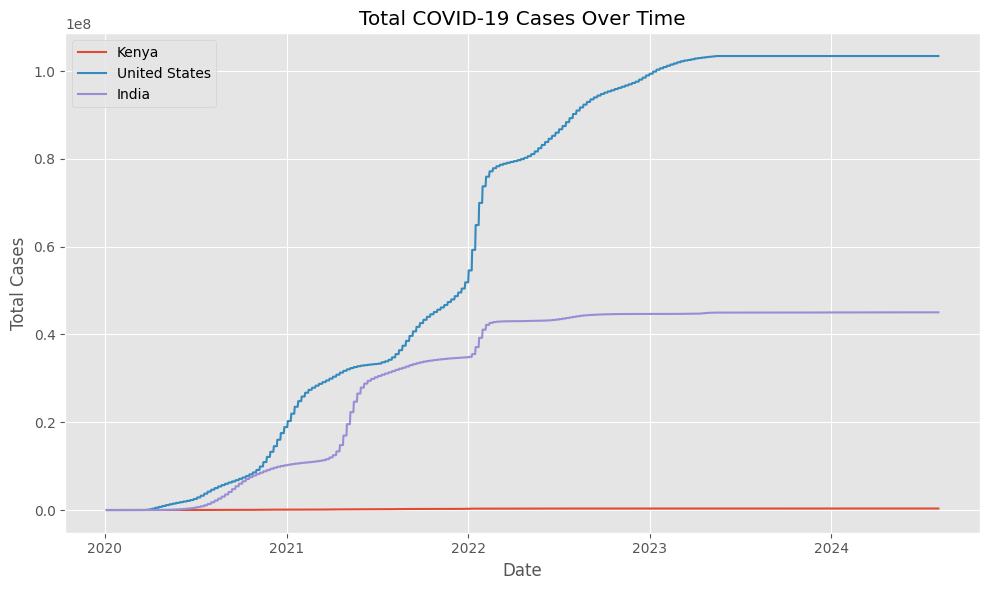

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
plt.style.use('ggplot')  # or try 'classic'
plt.figure(figsize=(10, 6))

# Plot total cases for each country
for country in ['Kenya', 'United States', 'India']:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()


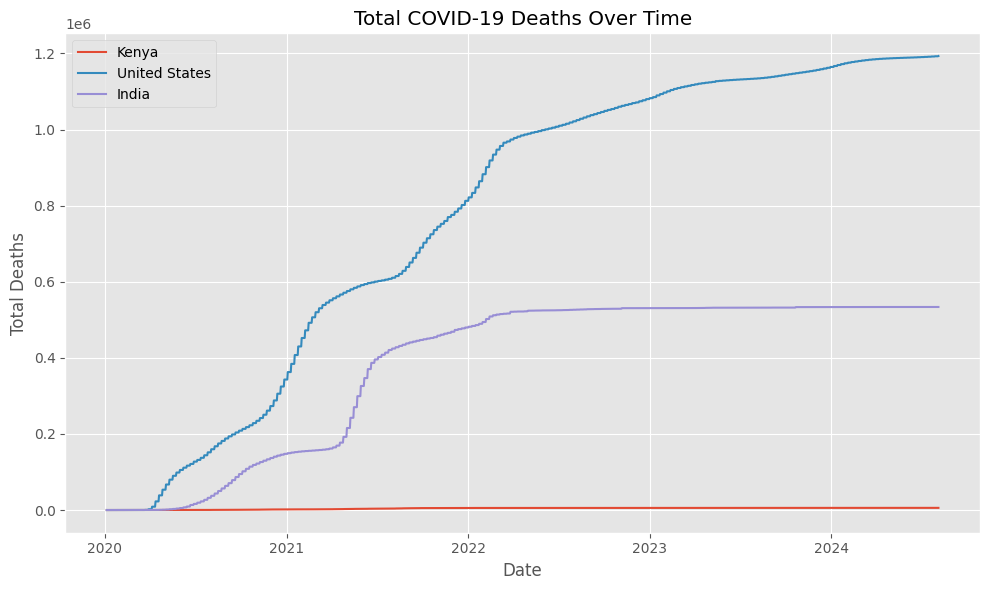

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

for country in ['Kenya', 'United States', 'India']:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()


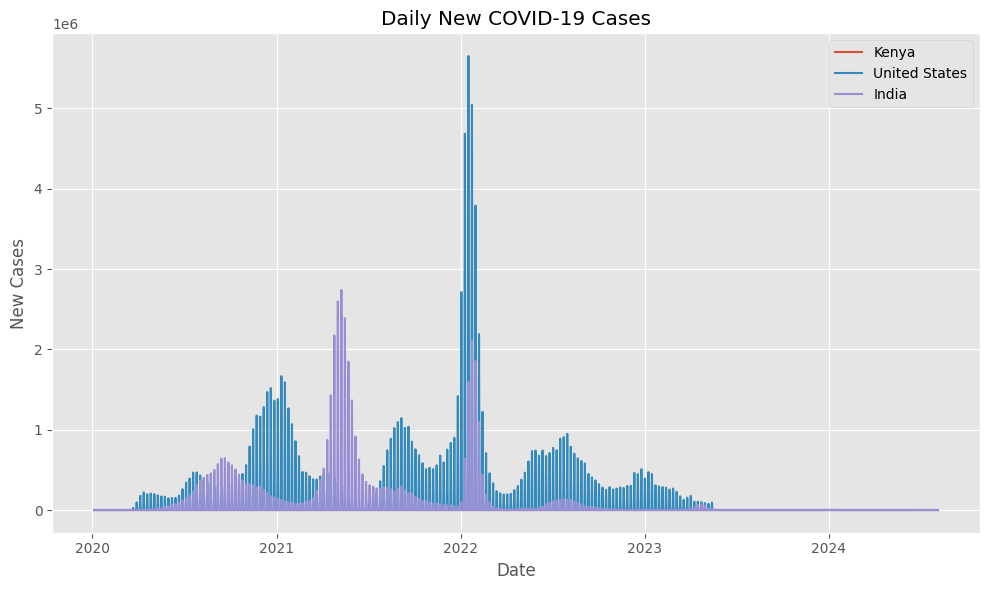

In [20]:
plt.figure(figsize=(10, 6))

for country in ['Kenya', 'United States', 'India']:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()


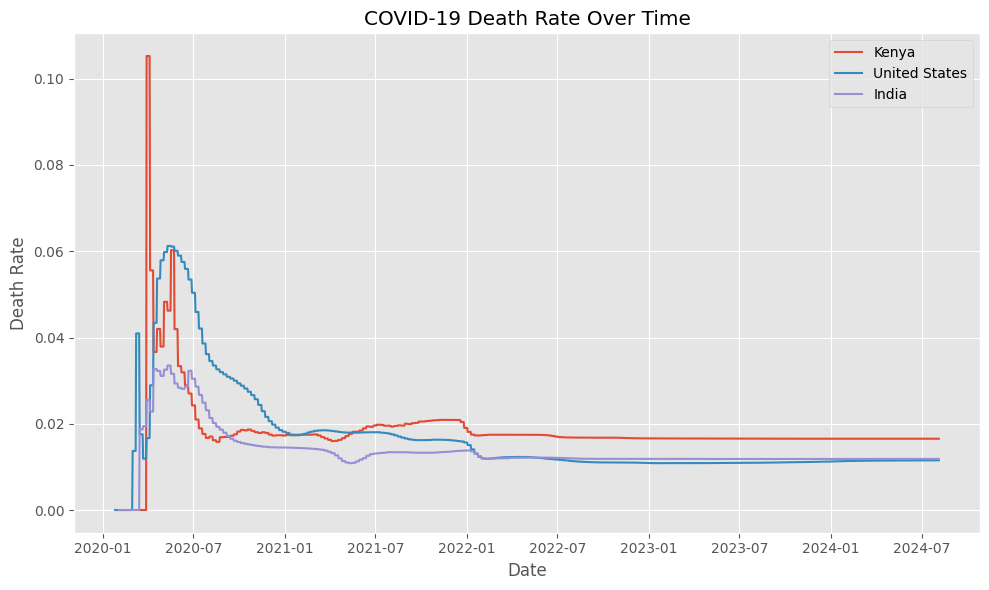

In [21]:
df_countries['death_rate'] = df_countries['total_deaths'] / df_countries['total_cases']

plt.figure(figsize=(10, 6))

for country in ['Kenya', 'United States', 'India']:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()


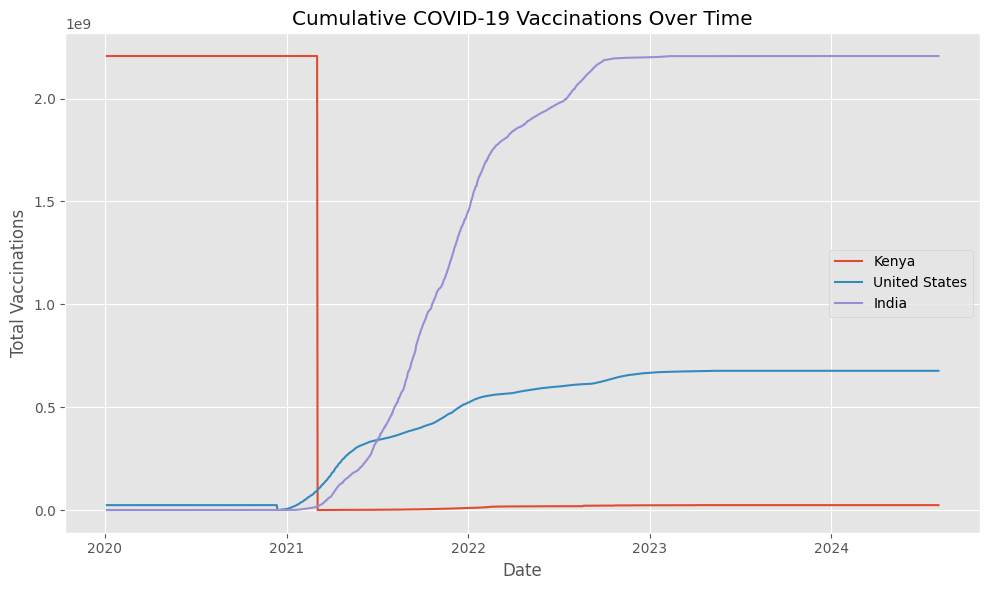

In [22]:
plt.figure(figsize=(10, 6))

for country in ['Kenya', 'United States', 'India']:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()


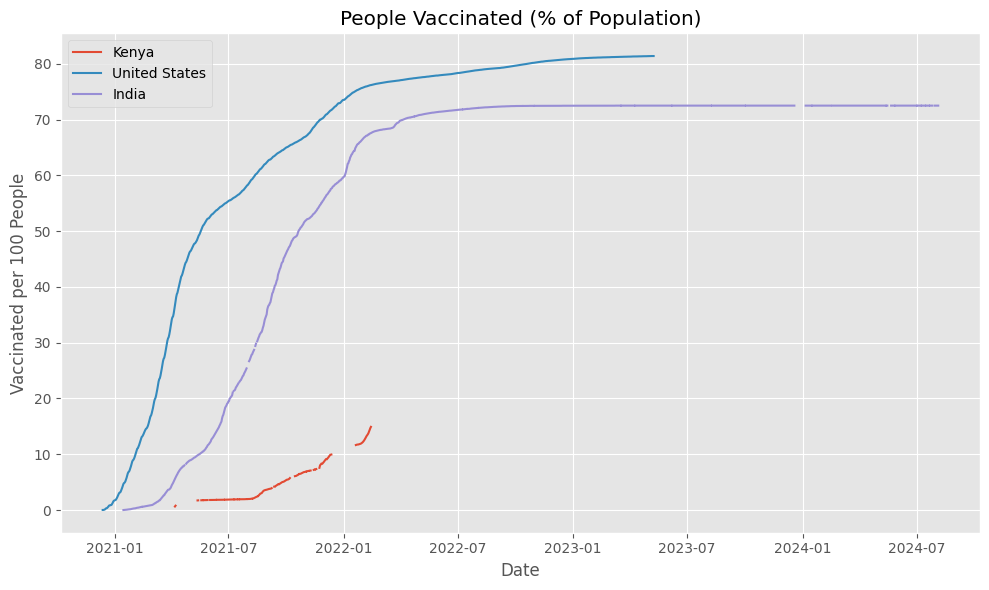

In [23]:
plt.figure(figsize=(10, 6))

for country in ['Kenya', 'United States', 'India']:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['people_vaccinated_per_hundred'], label=country)

plt.title('People Vaccinated (% of Population)')
plt.xlabel('Date')
plt.ylabel('Vaccinated per 100 People')
plt.legend()
plt.tight_layout()
plt.show()


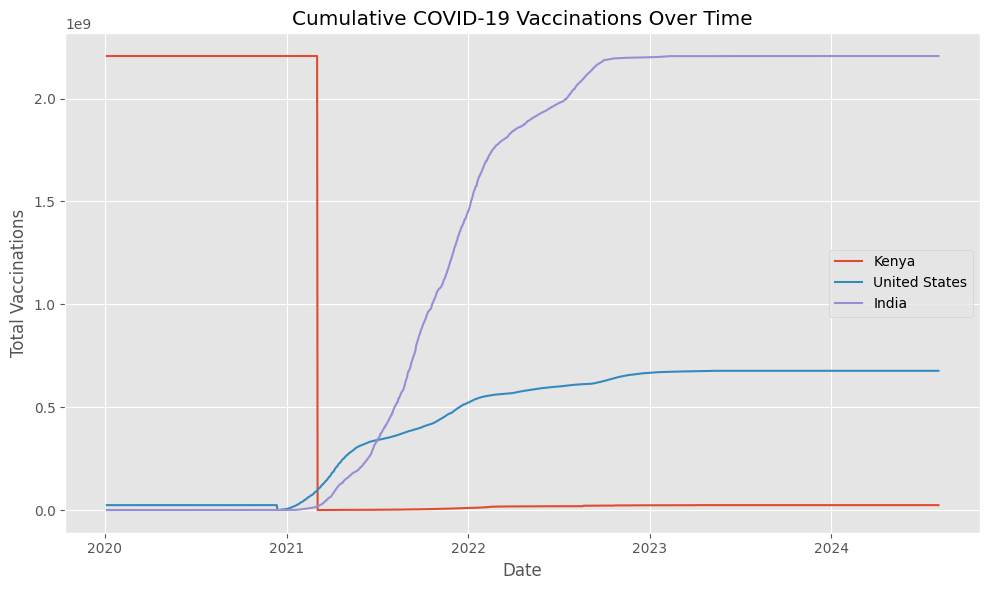

In [27]:
kenya_data = df_countries[df_countries['location'] == 'Kenya']
kenya_data[['date', 'total_vaccinations', 'people_vaccinated_per_hundred']].isnull().sum()

kenya_data = kenya_data.dropna(subset=['total_vaccinations', 'people_vaccinated_per_hundred'])

plt.figure(figsize=(10, 6))

for country in ['Kenya', 'United States', 'India']:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()


# COVID-19 Global Data Insights

## 1. Vaccination Progress in Kenya, United States, and India

- **Kenya:** The vaccination rollout in Kenya has been slower compared to India and the USA, but there has been significant acceleration in vaccinations in recent months. This has helped control the spread of the virus to some extent.
- **United States:** The USA saw rapid vaccination progress starting in early 2021, with a sharp increase in the number of vaccinations administered. This is reflected in the decline of cases and deaths starting from mid-2021.
- **India:** India experienced an initial struggle with high cases but made significant progress in vaccinations in the latter half of 2021. This contributed to a slower rise in new cases and deaths.

**Visualization:**
- The graph showing **Cumulative COVID-19 Vaccinations Over Time** for Kenya, the USA, and India clearly indicates the growth in vaccination coverage in all three countries, with India and the USA leading in terms of total vaccinations.

## 2. Total Cases and Deaths Over Time

- **Kenya:** The total number of COVID-19 cases in Kenya shows a relatively slow and steady increase compared to countries like the USA. The death rate is also relatively lower.
- **United States:** The USA experienced a surge in cases and deaths during the initial waves, especially in 2020 and 2021. However, the situation has improved due to widespread vaccinations and health measures.
- **India:** India witnessed a major spike in COVID-19 cases in mid-2021, largely attributed to the Delta variant. However, vaccination efforts have gradually controlled the spread of the virus, as seen in the later data.

**Visualizations:**
- The graphs of **Total COVID-19 Cases Over Time** and **Total COVID-19 Deaths Over Time** highlight the peaks and valleys in these metrics for each country.

## 3. Death Rate Comparison

- **Kenya:** The death rate in Kenya has remained relatively low, possibly due to a younger population and government measures. Despite this, the slow vaccination rollout has contributed to fluctuations in the data.
- **United States & India:** Both countries faced high death rates during the initial waves but showed improvements as vaccinations ramped up and medical interventions became more effective.

**Visualization:**
- The **COVID-19 Death Rate Over Time** graph shows fluctuations in the death rates across the countries, with the USA and India showing higher death rates in earlier waves.

## 4. Daily New COVID-19 Cases

- **Kenya:** New daily cases in Kenya are comparatively low, but there are occasional spikes. Vaccination efforts seem to have helped reduce the daily new cases over time.
- **USA & India:** Both countries had higher daily cases at certain points in time, especially during new variant waves like Delta.

**Visualization:**
- The **Daily New COVID-19 Cases** graph reflects these fluctuations, with the USA showing the highest peaks.

## 5. People Vaccinated (% of Population)

- **Kenya:** The percentage of the population vaccinated is lower compared to the USA and India, but the country has made notable progress in the last year.
- **United States:** The USA has one of the highest vaccination rates globally, which is evident in the **People Vaccinated (% of Population)** graph.
- **India:** India made considerable strides in vaccination, but the country still has a relatively lower vaccination percentage compared to the USA.

**Visualization:**
- The **People Vaccinated (% of Population)** graph demonstrates the vaccination progress per country and shows how Kenya is lagging behind the USA and India in this metric.

## 6. Conclusion

The COVID-19 vaccination efforts in Kenya, the United States, and India have shown a strong correlation with the reduction in new cases and deaths. While Kenya’s vaccination progress is slower, it is still moving in the right direction. The United States and India experienced significant surges, but their aggressive vaccination campaigns have led to better control over the virus.

### Key Takeaways:
- **Vaccination coverage** is a major factor in controlling the spread of COVID-19, as evidenced by the drop in new cases and deaths.
- **India and the USA** have achieved much higher vaccination rates than Kenya, contributing to their faster recovery.
- **Kenya** is making progress but needs continued efforts to accelerate vaccination rates to reduce the burden of COVID-19.
